In [1]:
%pylab inline
import numpy as np
from conway99 import *
import pickle

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


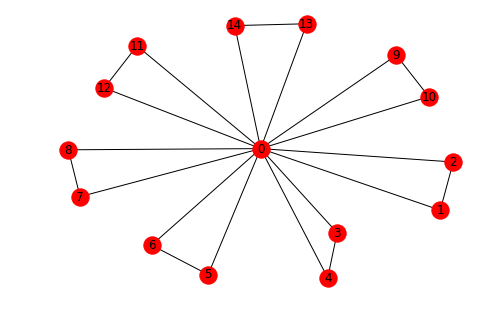

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

wlog, we let this be a neighbour of vertex 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


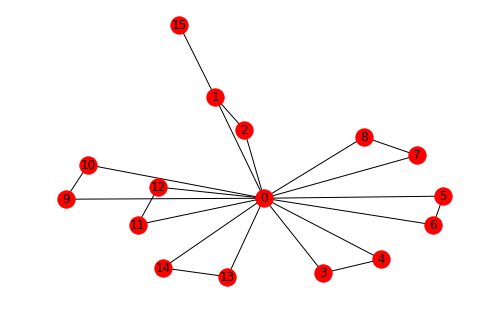

In [5]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15)])
print(seed16)
plot_given_edges(seed16)

In [6]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=0)

Wall time: 32.9 ms


In [7]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	1 reps from 1 candidates


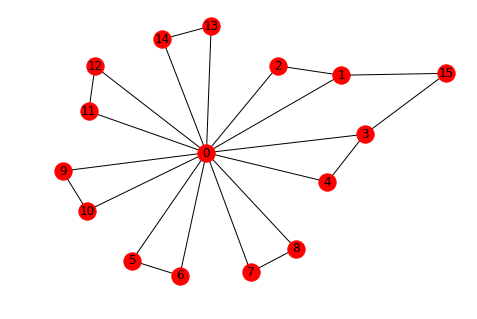

In [8]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


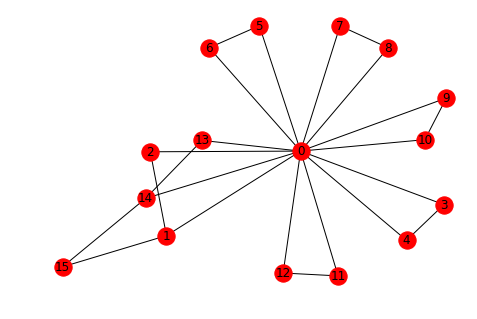

In [9]:
# alternative template 
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15), (15,14)])
print(seed16)
plot_given_edges(seed16)

In [10]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=0)

Wall time: 5.02 ms


In [11]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs([seed15], forced_edges=[(1,15), (15,14)])

2020-07-08 16:46:25.728381: Starting with 1 seeds
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
2020-07-08 16:46:25.733368: 1 valid graphs from templates
	1 reps from 1 candidates
2020-07-08 16:46:25.733368: Reduced to 1 representatives
Wall time: 4.99 ms


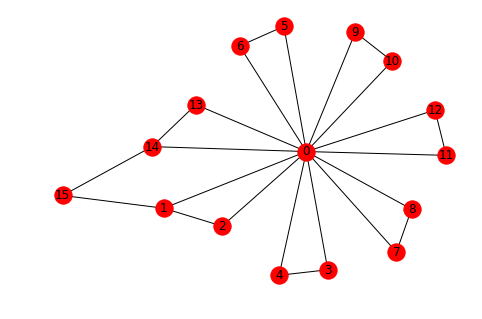

In [12]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We know one of the blades centred at vertex 1; namely 1-0-2-1.

We also have part of another, containing vertex 15.

wlog, let vertex 16 be the other vertex of that blade (_so we force 1-16, and 15-16_)

In [13]:
%time rep17 = find_valid_supergraphs(rep16, forced_edges=[(1,16),(15,16)], verbose=False)

2020-07-08 16:46:25.825090: Starting with 1 seeds
2020-07-08 16:46:25.864019: 11 valid graphs from templates
2020-07-08 16:46:25.866010: Reduced to 2 representatives
Wall time: 40.9 ms


Vertex 17 necessarily starts a new blade, so only forcing 1-17

In [14]:
%time rep18 = find_valid_supergraphs(rep17, forced_edges=[(1,17)], verbose=False)

2020-07-08 16:46:25.871963: Starting with 2 seeds
2020-07-08 16:46:25.973691: 20 valid graphs from templates
2020-07-08 16:46:25.975686: Reduced to 3 representatives
Wall time: 104 ms


However, we can then force vertex 18 to be the other vertex of that blade

In [15]:
%time rep19 = find_valid_supergraphs(rep18, forced_edges=[(1,18),(17,18)], verbose=False)

2020-07-08 16:46:25.980673: Starting with 3 seeds
2020-07-08 16:46:26.133264: 27 valid graphs from templates
2020-07-08 16:46:26.137253: Reduced to 5 representatives
Wall time: 158 ms


Continue in this fashion until we have all nhbrs of vertex 1, with forced fan pattern 0-2, 15-16, 17-18, 19-20, 21-22, 23-24, 25-26

In [16]:
%time rep20 = find_valid_supergraphs(rep19, forced_edges=[(1,19)], verbose=False)

2020-07-08 16:46:26.144234: Starting with 5 seeds
2020-07-08 16:46:26.432496: 40 valid graphs from templates
2020-07-08 16:46:26.437481: Reduced to 8 representatives
Wall time: 293 ms


In [17]:
%time rep21 = find_valid_supergraphs(rep20, forced_edges=[(1,20), (19,20)], verbose=False)

2020-07-08 16:46:26.444433: Starting with 8 seeds
2020-07-08 16:46:26.874315: 56 valid graphs from templates
2020-07-08 16:46:26.882261: Reduced to 10 representatives
Wall time: 438 ms


In [18]:
%time rep22 = find_valid_supergraphs(rep21, forced_edges=[(1,21)], verbose=False)

2020-07-08 16:46:26.887248: Starting with 10 seeds
2020-07-08 16:46:27.510578: 60 valid graphs from templates
2020-07-08 16:46:27.518557: Reduced to 17 representatives
Wall time: 632 ms


In [19]:
%time rep23 = find_valid_supergraphs(rep22, forced_edges=[(1,22), (21,22)], verbose=False)

2020-07-08 16:46:27.525540: Starting with 17 seeds
2020-07-08 16:46:28.506946: 85 valid graphs from templates
2020-07-08 16:46:28.519913: Reduced to 17 representatives
Wall time: 994 ms


In [20]:
%time rep24 = find_valid_supergraphs(rep23, forced_edges=[(1,23)], verbose=False)

2020-07-08 16:46:28.523869: Starting with 17 seeds
2020-07-08 16:46:29.543090: 68 valid graphs from templates
2020-07-08 16:46:29.553066: Reduced to 26 representatives
Wall time: 1.03 s


In [21]:
%time rep25 = find_valid_supergraphs(rep24, forced_edges=[(1,24), (23,24)], verbose=False)

2020-07-08 16:46:29.558021: Starting with 26 seeds
2020-07-08 16:46:30.889488: 78 valid graphs from templates
2020-07-08 16:46:30.901459: Reduced to 19 representatives
Wall time: 1.34 s


In [22]:
%time rep26 = find_valid_supergraphs(rep25, forced_edges=[(1,25)], verbose=False)

2020-07-08 16:46:30.907411: Starting with 19 seeds
2020-07-08 16:46:31.851913: 38 valid graphs from templates
2020-07-08 16:46:31.857908: Reduced to 19 representatives
Wall time: 950 ms


In [23]:
%time rep27 = find_valid_supergraphs(rep26, forced_edges=[(1,26),(25,26)], verbose=False)

2020-07-08 16:46:31.865847: Starting with 19 seeds
2020-07-08 16:46:32.581961: 19 valid graphs from templates
2020-07-08 16:46:32.585951: Reduced to 11 representatives
Wall time: 720 ms


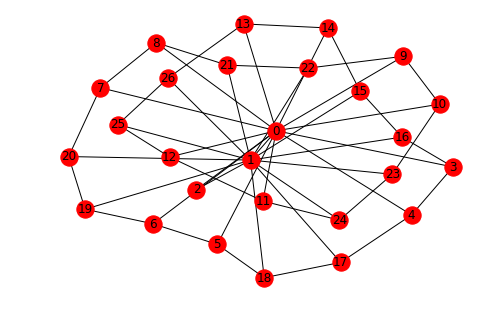

In [24]:
# Review an example

plot_given_edges(rep27[0])

# Saturating vertex 2

Although we have multiple possible 27-vertex graphs, for each of them we know that vertex 2 has degree 2: 
 * As a neighbour of vertex 0, it can only have one mutual neighbour amongst vertices 1,3-14, which is vertex 1
 * As a neighbour of vertex 1, it can only have one mutual neighbour amongst vertices 0,15-26, which is vertex 0
    
Thus we have precisely one blade centered at vertex 2, 2-0-1-2. 

In [25]:
# Confirm our claim:
[vertex_degrees(a)[2] for a in rep27]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

We note that vertices 2 and 3 are non-adjacent. Thus, they will have two mutual neighbours. 

Vertex 0 is one of these, but they cannot currently have another:
 * Vertex 1 neighbours 2 but not 3
 * Vertex 4 neighbours 3 but not 2
 * Vertices 5-14 neighbour neither 2 nor 3
 * Vertices v=15-26 neighbour vertex 1. Thus if v neighboured vertex 2, we'd have two mutual neighbours 0,v of 1,2. As 1 already neighbours 2, this is forbidden by the lambda condition.

In [26]:
# Confirm our claim:
[mutual_neighbours(2,3,a) for a in rep27]

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]

wlog, we may arrange for vertex 27 to be the second mutual neighbour of vertices 2 and 3. 
As a non-nhbr of 0, these are their two mutual neighbours, so by mu condition 27 is not a neighbour of any of 4 through 14.

In [27]:
non_edges27 = [(k,27) for k in range(4,15)]
non_edges27

[(4, 27),
 (5, 27),
 (6, 27),
 (7, 27),
 (8, 27),
 (9, 27),
 (10, 27),
 (11, 27),
 (12, 27),
 (13, 27),
 (14, 27)]

In [28]:
%time rep28 = find_valid_supergraphs(rep27, forced_edges=[(2,27),(3,27)], forced_non_edges=non_edges27, verbose=False)

2020-07-08 16:46:32.720561: Starting with 11 seeds
2020-07-08 16:46:33.753826: 131 valid graphs from templates
2020-07-08 16:46:33.777762: Reduced to 66 representatives
Wall time: 1.06 s


In [29]:
min([[k for k in range(27) if r[27][k] and k not in [2,3]] for r in rep28])

[15]

Similarly, vertices 2 and 4 are non-adajcent, with at least 1 mutual neighbour 0. Do they have any more?

In [30]:
max([len(mutual_neighbours(2,4,a)) for a in rep28])

1

No, so we introduce their second mutual neighbour now. 

Again, it cannot have any additional mutual neighbours with vertex 0, so is not adjacent to 3 or 5 through 14.

In [31]:
non_edges28 = [(k,28) for k in range(15) if k not in [2,4]]

In [32]:
%time rep29 = find_valid_supergraphs(rep28, forced_edges=[(2,28),(4,28)], forced_non_edges=non_edges28, verbose=False)

2020-07-08 16:46:33.800670: Starting with 66 seeds
2020-07-08 16:46:41.777754: 1396 valid graphs from templates
2020-07-08 16:46:42.045040: Reduced to 630 representatives
Wall time: 8.24 s


Similarly for vertex 5, there is only vertex 0 as a mutual neighbour with vertex 2:

In [33]:
max([len(mutual_neighbours(2,5,a)) for a in rep29])

1

So we add their second mutual neighbour next:

In [34]:
non_edges29 = [(k,29) for k in range(15) if k not in [2,5]]

In [35]:
%time rep30 = find_valid_supergraphs(rep29, forced_edges=[(2,29),(5,29)], forced_non_edges=non_edges29, verbose=False)

2020-07-08 16:46:42.069026: Starting with 630 seeds
2020-07-08 16:48:10.368789: 12878 valid graphs from templates
2020-07-08 16:48:12.792308: Reduced to 9932 representatives
Wall time: 1min 30s


Again for vertex 6, there is only vertex 0 as a mutual neighbour with vertex 2:

In [36]:
max([len(mutual_neighbours(2,6,a)) for a in rep30])

1

In [37]:
non_edges30 = [(k,30) for k in range(15) if k not in [2,6]]

In [38]:
%time rep31 = find_valid_supergraphs(rep30, forced_edges=[(2,30),(6,30)], forced_non_edges=non_edges30, verbose=False)

2020-07-08 16:48:12.893004: Starting with 9932 seeds
2020-07-08 17:17:17.958235: 217303 valid graphs from templates
2020-07-08 17:18:01.256380: Reduced to 135195 representatives
Wall time: 29min 48s


In [39]:
pickle.dump( rep31, open( "fullsearch-31.p", "wb" ) )

_next stage errors out due to insufficient memory_

Again for vertex 7, there is only vertex 0 as a mutual neighbour with vertex 2:

In [40]:
max([len(mutual_neighbours(2,7,a)) for a in rep31])

1

In [41]:
non_edges31 = [(k,31) for k in range(15) if k not in [2,7]]

In [42]:
#%time rep32 = find_valid_supergraphs(rep31, forced_edges=[(2,31),(7,31)], forced_non_edges=non_edges31, verbose=False)